In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle 
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support

from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

only dataset CIC


In [6]:

X_train = np.load("new_x_train.npy")
X_test = np.load("new_x_test.npy")
y_train = np.load("new_y_train.npy")
y_test = np.load("new_y_test.npy")



Accuracy: 0.9986760381289703
Precision of RF: 0.9986506703742745
Recall of RF: 0.9986760381289703
F1-score of RF: 0.9986506064477597
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    567830
           1       0.83      0.65      0.73       489
           2       1.00      1.00      1.00      3458
           3       1.00      1.00      1.00     32006
           4       1.00      1.00      1.00     62931
           5       1.00      0.11      0.20         9
           6       0.99      1.00      0.99     39701
           7       0.99      0.97      0.98       545

    accuracy                           1.00    706969
   macro avg       0.98      0.84      0.86    706969
weighted avg       1.00      1.00      1.00    706969



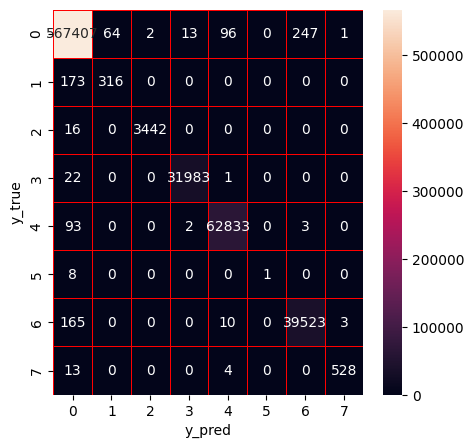

In [7]:
# Train Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
precision,recall,fscore,none= precision_recall_fscore_support(y_test, y_pred, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

generated data + CIC

In [8]:
generated_X = np.load('new_a1_train.npy')
generated_y = np.load('new_b1_train.npy')
X = pd.concat([pd.DataFrame(X_train), pd.DataFrame(generated_X),pd.DataFrame(X_test)], ignore_index=True)
y = pd.concat([pd.DataFrame(y_train), pd.DataFrame(generated_y),pd.DataFrame(y_test)], ignore_index=True)
y= y.values.ravel()

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


Accuracy: 0.998820429117567
Precision of RF: 0.9988196934107313
Recall of RF: 0.998820429117567
F1-score of RF: 0.9988195474278324
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    567836
         1.0       0.98      0.97      0.98      7539
         2.0       1.00      0.99      0.99      4455
         3.0       1.00      1.00      1.00     32114
         4.0       1.00      1.00      1.00     62986
         5.0       1.00      1.00      1.00    383051
         6.0       0.99      1.00      0.99     39788
         7.0       0.99      0.99      0.99      6870

    accuracy                           1.00   1104639
   macro avg       1.00      0.99      0.99   1104639
weighted avg       1.00      1.00      1.00   1104639



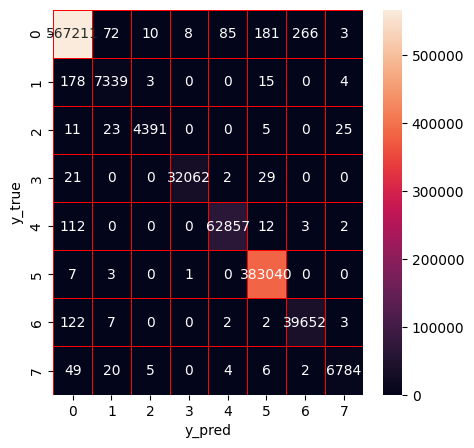

In [9]:
# Train Random Forest model

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train, y_train)

# Evaluate
y_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
precision,recall,fscore,none= precision_recall_fscore_support(y_test, y_pred, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Real dataset

In [10]:

X_train = np.load("new_x_train.npy")
X_test = np.load("new_x_test.npy")
y_train = np.load("new_y_train.npy")
y_test = np.load("new_y_test.npy")


In [11]:
!pip3 install xgboost
import xgboost as xgb

In [12]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [13]:
params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'eval_metric': 'mlogloss',
    'max_depth': 6,
    'eta': 0.3,
    'num_class': 8,  # Number of classes
    'seed': 42
}

num_round = 100
bst = xgb.train(params, dtrain, num_round)


In [14]:
# Predictions
preds = bst.predict(dtest)

# Evaluate
accuracy = accuracy_score(y_test, preds)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Detailed classification report
print('Classification Report:')
print(classification_report(y_test, preds))

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, preds))



Accuracy: 99.85%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    567830
           1       0.92      0.51      0.65       489
           2       0.99      1.00      0.99      3458
           3       1.00      1.00      1.00     32006
           4       1.00      1.00      1.00     62931
           5       1.00      0.33      0.50         9
           6       0.99      1.00      1.00     39701
           7       0.93      0.91      0.92       545

    accuracy                           1.00    706969
   macro avg       0.98      0.84      0.88    706969
weighted avg       1.00      1.00      1.00    706969

Confusion Matrix:
[[567303     21     17     15    187      0    252     35]
 [   241    248      0      0      0      0      0      0]
 [    12      0   3446      0      0      0      0      0]
 [    19      0      0  31984      3      0      0      0]
 [   198      0      0      1  62728      0      4     

generated + real

In [15]:
generated_X = np.load('new_a1_train.npy')
generated_y = np.load('new_b1_train.npy')
X = pd.concat([pd.DataFrame(X_train), pd.DataFrame(generated_X),pd.DataFrame(X_test)], ignore_index=True)
y = pd.concat([pd.DataFrame(y_train), pd.DataFrame(generated_y),pd.DataFrame(y_test)], ignore_index=True)
y= y.values.ravel()

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [16]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

In [17]:
params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'eval_metric': 'mlogloss',
    'max_depth': 6,
    'eta': 0.3,
    'num_class': 8,  # Number of classes
    'seed': 42
}

num_round = 100
bst = xgb.train(params, dtrain, num_round)

In [18]:
# Predictions
preds = bst.predict(dtest)

# Evaluate
accuracy = accuracy_score(y_test, preds)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Detailed classification report
print('Classification Report:')
print(classification_report(y_test, preds))

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, preds))

Accuracy: 99.86%
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    567836
         1.0       1.00      0.96      0.98      7539
         2.0       0.99      0.99      0.99      4455
         3.0       1.00      1.00      1.00     32114
         4.0       1.00      1.00      1.00     62986
         5.0       1.00      1.00      1.00    383051
         6.0       0.99      1.00      1.00     39788
         7.0       0.98      0.98      0.98      6870

    accuracy                           1.00   1104639
   macro avg       0.99      0.99      0.99   1104639
weighted avg       1.00      1.00      1.00   1104639

Confusion Matrix:
[[567112     13     36     10    247     55    277     86]
 [   322   7209      2      0      0      1      0      5]
 [    19      6   4412      0      0      3      1     14]
 [    20      0      0  32085      2      7      0      0]
 [   288      0      1      3  62686      2      5     

real

In [19]:
X_train = np.load("new_x_train.npy")
X_test = np.load("new_x_test.npy")
y_train = np.load("new_y_train.npy")
y_test = np.load("new_y_test.npy")

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dtc = DecisionTreeClassifier(random_state=42)

# Train the model
dtc.fit(X_train, y_train)

# Make predictions
y_pred = dtc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
precision,recall,fscore,none= precision_recall_fscore_support(y_test, y_pred, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_test,y_pred))

Accuracy: 0.9981102424575901
Precision of RF: 0.9981138690987773
Recall of RF: 0.9981102424575901
F1-score of RF: 0.9981114733674596
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    567830
           1       0.71      0.73      0.72       489
           2       0.99      0.99      0.99      3458
           3       1.00      1.00      1.00     32006
           4       1.00      1.00      1.00     62931
           5       0.40      0.22      0.29         9
           6       0.99      0.99      0.99     39701
           7       0.98      0.97      0.97       545

    accuracy                           1.00    706969
   macro avg       0.88      0.86      0.87    706969
weighted avg       1.00      1.00      1.00    706969



real + generated data

In [22]:
generated_X = np.load('new_a1_train.npy')
generated_y = np.load('new_b1_train.npy')
X = pd.concat([pd.DataFrame(X_train), pd.DataFrame(generated_X),pd.DataFrame(X_test)], ignore_index=True)
y = pd.concat([pd.DataFrame(y_train), pd.DataFrame(generated_y),pd.DataFrame(y_test)], ignore_index=True)
y= y.values.ravel()

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [23]:
dtc = DecisionTreeClassifier(random_state=42)

# Train the model
dtc.fit(x_train, y_train)

# Make predictions
y_pred = dtc.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
precision,recall,fscore,none= precision_recall_fscore_support(y_test, y_pred, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_test,y_pred))

Accuracy: 0.9971456738355245
Precision of RF: 0.9971402080649003
Recall of RF: 0.9971456738355245
F1-score of RF: 0.9971425965821368
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    567836
         1.0       0.95      0.94      0.94      7539
         2.0       0.97      0.96      0.97      4455
         3.0       1.00      1.00      1.00     32114
         4.0       1.00      1.00      1.00     62986
         5.0       1.00      1.00      1.00    383051
         6.0       0.99      0.99      0.99     39788
         7.0       0.97      0.96      0.96      6870

    accuracy                           1.00   1104639
   macro avg       0.98      0.98      0.98   1104639
weighted avg       1.00      1.00      1.00   1104639

